# ISyE 6416 Computational Statistics Homework 5 
Name: Chen-Yang(Jim), Liu\
School: Georgia Tech

# Problem (1) Nonlinear regression using spline

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = np.loadtxt("/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/copper-new.txt")

In [3]:
y = df[:, [0]]
X = df[:, [1]]

## (a) Perform linear regression on the data. Report the fitted model and the fitting error.

In [4]:
from numpy.linalg import inv
# add intercept 
ones = np.ones((len(X), 1))
#combined
X_withIntercept = np.concatenate((ones, X), axis = 1)
#betahat
betahat = inv(X_withIntercept.T @ X_withIntercept) @ X_withIntercept.T @ y
betahat

array([[7.38412739],
       [0.02128314]])

Text(0.5, 1.0, 'Y vs. X')

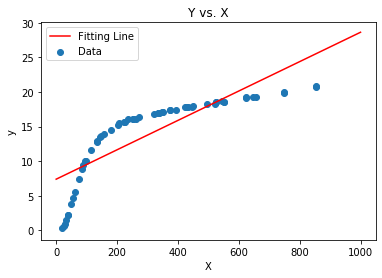

In [6]:
elements = [i for i in np.arange(0, 1000)]
y_loop= []
for i in elements:
    y_loop.append(7.38412739 + i * 0.02128314)

plt.plot(elements, y_loop, c='r', label = "Fitting Line")
plt.scatter(X, y, label = "Data")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title("Y vs. X")

In [7]:
X_elements = df[:, 1]
true_y = df[:, 0]
RSS = []
for i in range(len(X_elements)):
    fitted = 7.38412739 + X_elements[i] * 0.02128314
    RSS.append((fitted - true_y[i]) ** 2)

print("Linear Model: y = {0} + {1} * x".format(betahat[0][0], betahat[1][0]))
print("Fitting Error:", sum(RSS))

Linear Model: y = 7.384127393045498 + 0.021283144237618158 * x
Fitting Error: 620.7208889638787


From the above, the linear model of part(a) is $y = 7.384127393045498 + 0.021283144237618158 * x $
And, the fitting error is 620 where the formula is Residual Sum of Squares $\sum_{i=1}^{n}(x - \bar{x})^{2}$

## (b) Perform nonlinear regression with spline function (i.e., using all data points). 
Use GCV for find λ. Report the fitting error.

In [9]:
len(X_elements)

59

In [10]:
from numpy import linalg as LA
# Data
X_elements = df[:, 1]
true_y = df[:, [0]]

num_elements = len(X_elements)

h = (max(X_elements) - min(X_elements)) / (len(X_elements) - 1) # total distance divide by number of knots - 1 (59knots -> 58 intervals)
weights = np.eye(len(X_elements)) #number of weights used for cross validation 
Q_Matrix = np.zeros((num_elements - 2, num_elements))# Q (57 * 59 matrix)
#create Q matrix with h
for i in range(Q_Matrix.shape[0]):
    for j in range(3):
        if j % 2 == 1:
            Q_Matrix[i][i + j] = -2 / h
        else:
            Q_Matrix[i][i + j] = 1 / h

identity = np.eye(num_elements - 2) # M (57 * 57 matrix)
M_Matrix = np.multiply(identity, 2 / 3 * h)
#  Create M matrix with h
for i in range(identity.shape[0] - 1):
    M_Matrix[i][i + 1] = h / 6
    M_Matrix[i + 1][i] = h / 6

# Compute for GCV(lambda)
lambda_it = [i for i in np.linspace(0.01, 2, 100)]
GCV = []
for i in range(len(lambda_it)):
    lamda = lambda_it[i]
    QMQ = np.multiply(Q_Matrix.T @ inv(M_Matrix) @ Q_Matrix, lamda)
    Slambda = np.multiply(inv(np.add(weights, QMQ)), weights)
    a_top = np.power(LA.norm(true_y - np.multiply(Slambda, true_y)), 2)
    b_below = np.power(1 - np.divide(np.trace(Slambda), num_elements), 2)
    GCV.append(np.divide(a_top, b_below))

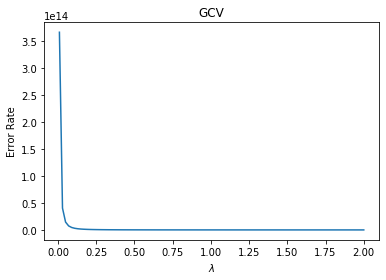

Minimum Lambda: 2.0


In [11]:
# plot GCV VS lambda
plt.plot(lambda_it, GCV)
plt.ylabel("Error Rate")
plt.xlabel("$\lambda$")
plt.title("GCV")
plt.show()
print("Minimum Lambda:", lambda_it[GCV.index(min(GCV))])

In [12]:
QMQ_new = np.multiply(Q_Matrix.T @ inv(M_Matrix) @ Q_Matrix, 2.0)
Slambda_new = np.multiply(inv(np.add(weights, QMQ_new)), weights)
y_hat = np.multiply(Slambda_new, true_y)
y_hat_to_array = []
for i in range(len(y_hat)):
    y_hat_to_array.append(y_hat[i][i])
y_hat_array = np.array(y_hat_to_array)

In [20]:
s = sorted(y_hat_array)
x_sort = sorted(X_elements)

Fitting error: 1.189281188415568


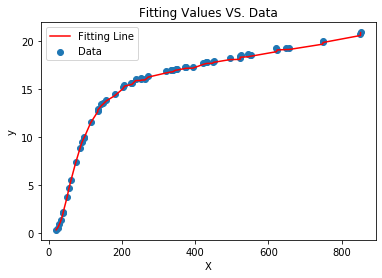

In [25]:
plt.scatter(X_elements, true_y, label = "Data")
plt.plot(x_sort,s , c = 'r', label = "Fitting Line")
plt.title("Fitting Values VS. Data")
plt.xlabel("X")
plt.ylabel('y')
plt.legend()

y_array = df[:, 0]
RSS = []
for i in range(len(y_hat_array)):
    RSS.append((y_array[i] - y_hat_array[i]) ** 2)
print("Fitting error:", sum(RSS))

From the above codes, for part(b) in problem(1), we chose $\lambda = 2$ as our tuning parameters and the fitting error is around 1.19.

## (c) Predict the coefficient at 400 degree Kelvin.

In [14]:
to_sorted = [[i, j] for i, j in zip(X_elements, y_hat_array)]
sorted_X = sorted(to_sorted)
X_sort = [sorted_X[i][0] for i in range(len(sorted_X))]
y_sort = [sorted_X[i][1] for i in range(len(sorted_X))]

Cubic Spline at 400 degrees Kelvin: 17.252860307873554
Linear Model at 400 degrees Kelvin: 15.89738339


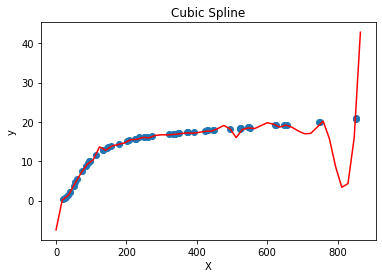

In [17]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(X_sort, y_sort)
xs = np.linspace(0, 865)
ys = cs(xs)
plt.plot(xs, ys, c = 'r')
plt.scatter(X_elements, true_y)
plt.title("Cubic Spline")
plt.xlabel("X")
plt.ylabel("y")
print("Cubic Spline at 400 degrees Kelvin:", cs(400))
print("Linear Model at 400 degrees Kelvin:", 7.38412739 + 400 * 0.02128314)

There is an interesting thing to think that when x is over 750. There is an big upside and down, and the reason might be that there are fewer points in this area.

From the above codes, for part(c) in problem 1:

* Linear Model Prediction at 400 degrees Kelvin is 15.89738339.
* Cubic Spline Prediction at 400 degrees Kelvin is 17.25286030.

# Problem(2) PCA for face recognition.

## (a) Perform data analysis on the Yale face dataset for subject 14.
Plot the mean face and the first 6 eigenfaces for subject 14.

In [29]:
import os

# List all files in a directory using os.listdir
basepath = '/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces'
collections = []
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        if "14" in entry:
            collections.append(entry)
collections[:5]

['subject14.leftlight.gif',
 'subject14.normal.gif',
 'subject14.rightlight.gif',
 'subject14.sleepy.gif',
 'subject14.test.gif']

In the beginning, we try to print out every image to know more about facial structures.

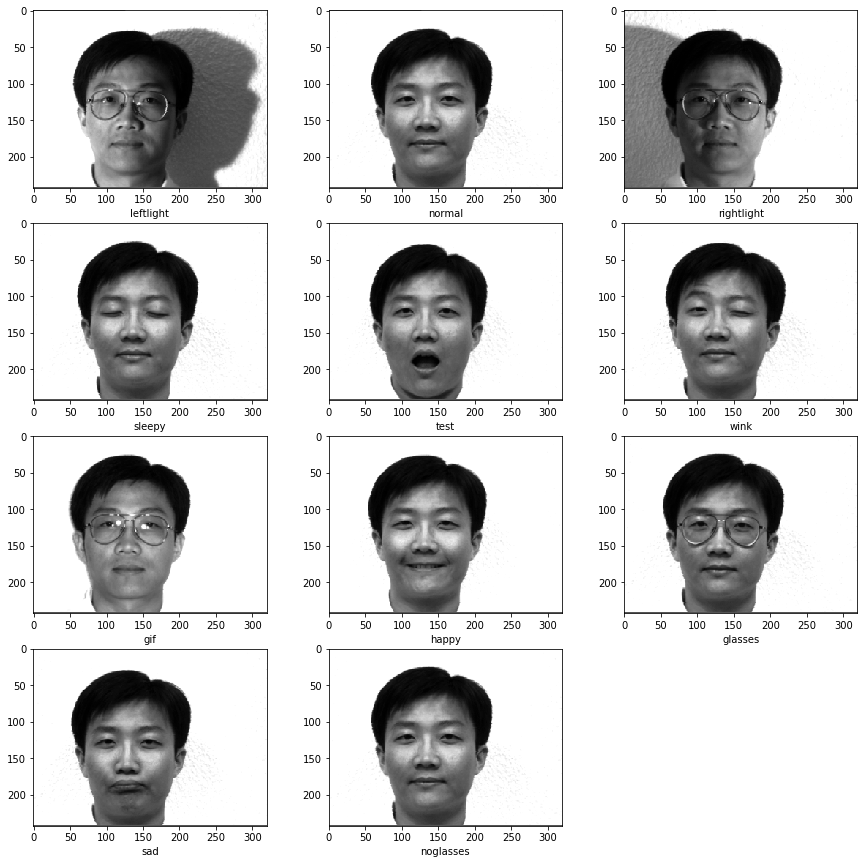

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
index = 1
plt.figure(figsize=(15, 15))
for i in range(len(collections)):
    img = mpimg.imread("/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces/{}".format(collections[i]))
    plt.subplot(4, 3, index)
    index += 1
    plt.imshow(img, cmap = 'Greys_r')
    plt.xlabel("{}".format(collections[i].split('.')[1]))
plt.show()

In [31]:
# mean face 
from PIL import Image

arrays = []
for i in range(11):
    im = Image.open("/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces/{}".format(collections[i]))
    arr = mpimg.pil_to_array(im)
    arrays.append(arr)
nparrays = np.array(arrays)
mean_face_array = np.zeros(shape = (243, 320))

row = 0
column = 0
for i in range(mean_face_array.shape[0]):
    for j in range(mean_face_array.shape[1]):
        mean_pixel = 0
        for index in range(len(collections)):
            mean_pixel += nparrays[index][i][j]
        mean_face_array[i][j] = mean_pixel / len(collections)

To create a set of eigenfaces, one must:

1. Prepare a training set of face images (11 images -> test image out -> 10 images)
   Each image is treated as one training sample (i.e. (243 * 320) * 10 matrix)
2. Subtract the mean.
3. Calculate the eigenvectors and eigenvalues of the covariance matrix
4. Choose the principal components
5. Get descending eigenvalues of first six components.

In [32]:
#Helper functions
from scipy import linalg as LA
from scipy.sparse.linalg import svds, eigs
# pca function 
def faceSVD(X):
    '''
    X: matrix that is unnormalized for a non-square matrix
    '''
    # mean: each row 
    mean = np.mean(X, axis = 1).reshape(len(X), 1)
    # standard derivation
    #std = np.std(X, axis = 1).reshape(len(X), 1)
    # normalized -> not normalized since it will create many nans or infs
    minusmean = np.subtract(X, mean)
    #X = np.divide(minusmean, std)
    # SVD
    #u, d, v = LA.svd(X, overwrite_a = True,lapack_driver = 'gesvd')
    u, d, v = svds(minusmean)
    return u, d, v

# downsample image 
def downsample(X, factor):
    '''
    X: matrix representing images 
    factor: an integer that we want to downsample to factor * factor image
    ----------
    image: 243 * 320
    downsampled image: 16 * 4860 (243 * 320 -> downscale to 15 * 20)
    '''
    height = 0
    width = 0
    if (X.shape[0] % factor is not 0 or X.shape[1] % factor is not 0):
        height = int((X.shape[0] -  (X.shape[0] % factor)) /  factor)
        width = int((X.shape[1] -  (X.shape[1] % factor)) /  factor)
    else:
        height = int(X.shape[0] / factor)
        width = int(X.shape[1] / factor)
    # patches
    patch = np.zeros((factor * factor, height * width))
    test = X
    for ii in range(height):
        for jj in range(width):
            tmp = test[ii * factor: (ii + 1) * factor, jj * factor: (jj + 1) * factor]
            patch[:, ii * width + jj] = tmp.flatten()
    return patch

In [33]:
import os
train_imgs = np.zeros((0, 243 * 320))

# List all files in a directory using os.listdir
basepath = '/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces'
train_images = []
test_image = []
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        if "14" in entry and "test" not in entry:
            train_images.append(entry)
        elif "test" in entry:
            test_image.append(entry)

for i in range(len(train_images)):
    im = Image.open("/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces/{}".format(train_images[i]))
    copy = train_imgs.copy()
    arr = mpimg.pil_to_array(im)
    train_imgs = np.concatenate((copy, arr.reshape(1, 243 * 320)), axis = 0)

# mean
mean_train = np.mean(train_imgs, axis = 0)
mean_train = mean_train.reshape(mean_train.shape[0], 1)
# eigenv, eigenvalues
s_diff, d_diff, v_diff = faceSVD(train_imgs)
s_diff, d_diff, v_diff = s_diff[::-1], d_diff[::-1], v_diff[::-1]

### (1) Mean Face
Reference is from [Face Recognition Using Eigenfaces](https://www.cin.ufpe.br/~rps/Artigos/Face%20Recognition%20Using%20Eigenfaces.pdf)


Text(0.5, 1.0, 'Mean Face')

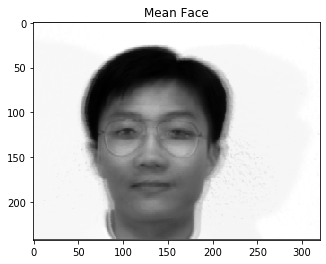

In [34]:
plt.imshow(mean_train.reshape(243, 320), cmap = 'Greys_r')
plt.title('Mean Face')

### (2) First Six Eigenfaces

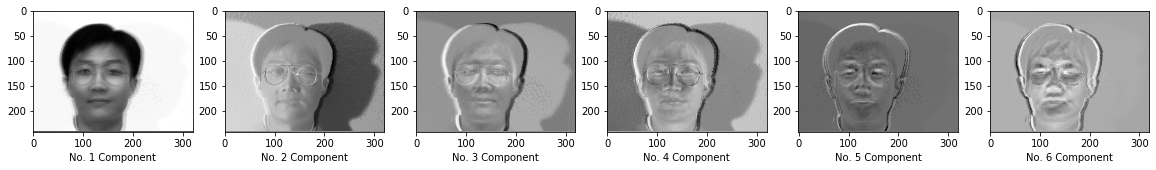

In [35]:
v_diff.T.shape
plt.figure(figsize = (20,20))
plot_index = 1

for i in range(6):
    rec = v_diff.T[:,[i]]
    rec = rec.reshape(243, 320)
    plt.subplot(1, 6, plot_index)
    plot_index += 1
    plt.xlabel("No. "+ str(i + 1)+ " Component")
    plt.imshow(rec, cmap = 'Greys_r')

From first six eigenfaces, we can know the first eigneface can nearly represent a person. And, with larger eigenfaces, gradually, the infomation is not derived so much. Maybe the second component represents shadow and the third one represents light. 

## (b) Now use subject14.test.gif to perform face recognition using the following procedure.

Outline of Face Recognition:
Given an test image, $\Gamma$,
 
1. $\Gamma^{'} = \Gamma - \Psi\ (mean\ face)$
2. $w_{1} = \mu_{1}^{T}\Gamma^{'}$

The weights form a vctor $w$ that represents contribution of each eigenface in representing the input image. So it transform input image into eigenspace. 

For the question, are we able to recognize the person correctly using the first principle component?
The answer is Yes. 

Since the first eigenface represents larger variance that means we have more infomation by projection onto first eigenface, we could clearly know the scores of the weight.

For Facial Recognition, the simplest method for determining which face class provides the best description of an input face image is based on facial images in database. Then we project these images onto the first component to get their weights. Then, we use Eucleadian distance, $|| w - w_{database}|| < \delta$. If the distance is below $\delta$, we classify this image as similar. Otherwise, it is assigned as Unknown.

In [25]:
first_eigenface = v_diff[0].reshape(77760, 1)

In [26]:
im = Image.open("/Users/jim/Dropbox (GaTech)/Courses/ISyE6416/Homework/Homework5/yalefaces/subject14.test.gif")
arr = mpimg.pil_to_array(im)

# difference 
mean_train_reshape = mean_train.reshape(243, 320)
diff = np.subtract(arr, mean_train_reshape).reshape(77760, 1)

#weights
weights = np.abs(first_eigenface.T @ diff)
weights

array([[898.12671473]])

From the score 898.1267, we use this to compare each image's weight. If we find the distance below $\delta$, we will detect this image. Otherwise, this image is unknown. For example, if the weight of an image in our database is 800 and we define $\delta$ as 100. So we could know these two images are similar.

# Problem (3) Recommender systems

In [74]:
df_movie = pd.read_excel('Movie.xlsx')

## Data Clearning

In [75]:
df_movie.head()

,For favourites 1 identifies the choice(s). For ratings 5 is the best and 1 is the worst. (I have flipped the results from the survey to be consistent.) I left unfilled ones as 0. -H,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Gender,NaN,Male,Male,Male,Male,Male,Male,Female,Male,...,Male,Male,Male,Male,Female,Female,Male,Female,Male,Male
1,Favourite Colour,NaN,Blue,Orange,Black,Blue,Blue,Green,Blue,Green,...,Green,Other,Blue,Blue,Blue,Red,Blue,Blue,Blue,Red
2,Favourite Genres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Drama,NaN,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Action,NaN,0,1,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [76]:
df_movie.rename(columns = {'For favourites 1 identifies the choice(s). For ratings 5 is the best and 1 is the worst. (I have flipped the results from the survey to be consistent.) I left unfilled ones as 0.  -H':'Ratings'}, inplace = True)

In [77]:
userList = ["User{}".format(i + 1) for i in range(df_movie.iloc[:36, 1:].shape[1])]

In [78]:
df_movie.set_index("Ratings", inplace = True)

In [79]:
subDF = df_movie.iloc[:36, 1:]
dict_user = {i : j for i, j in zip(subDF.columns, userList)}
subDF = subDF.rename(columns = dict_user).drop(['Favourite Genres', 'Movie Ratings'])

### Strategy for using User-based Collaboritive Filter:
1. in this dataset, 0 means null values that users leave this block blank. But when we calculate these values will affect our similarity functions.
2. for favorite genres, 0 means dislike or no preference that users do not have inclination toward this kind of genre. So in this field, 0 has meaning and is not a null value. So we would not change values of this one.
3. for movie ratings, 0s means null values, but it will create misunderstanding between other zero values that have meaning. So in this situation, we will change 0 to -1 to differentiate.
4. calculate similarity scores to get similar scores\
    And for missing values, we will not use this data point to get similar score if each of them has -1 value.
5. We will select top 1 user who is similar to the picked user. If the top 1 user has null values same as the picked user's. We will pick the second highest user, and so on.

In [80]:
row_list = list(subDF.T.columns)
preprocess = subDF.copy()
gender = pd.get_dummies(preprocess.iloc[0,:])
colors = pd.get_dummies(preprocess.iloc[1])
movies = preprocess.iloc[14:, :]
movies_numpy = movies.to_numpy()
for i in range(movies_numpy.shape[0]):
    for j in range(movies_numpy.shape[1]):
        if movies_numpy[i][j] == 0:
            movies_numpy[i][j] = -1

In [81]:
middle = preprocess.append(gender.T).append(colors.T)
updated_columns = list(middle.T.columns)
for i in range(34):
    updated_columns[i] = row_list[i]
middle.set_axis(updated_columns, axis = 0)
rearrange = middle.T.columns
index_list = []
for i in range(len(rearrange)):
    if rearrange[i] == "Female":
        index_list.append(i)
    if i == len(rearrange) - 1:
        index_list.append(i)
long_list = rearrange[34:].append(rearrange[2:index_list[0]])
long_list
final = middle.reindex(long_list)
final = final.drop(['Female']).rename(index = {'Male': "Gender"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """


In [82]:
final.head()

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
Gender,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,0,0,1,0,1,1
Black,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blue,1,0,0,1,1,0,1,0,1,1,...,0,0,1,1,1,0,1,1,1,0
Green,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Orange,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Introduction to three similar functions
(1) L-2 norm: $||x_{i} - x ||_{2} = (\sum_{i=1}^{n}(x_{i} - x)^{2})^{\frac{1}{2}}$\
(2) L-1 norm: $||x_{i} - x||_{1} = \sum_{i=1}^{n} |x_{i} - x|$\
(3) L-0 norm(Hamming distance): 
$||x_{i} - x||_{0} = 1\ ,if\ x_{i} \neq x $ 
                 $\ ,0\ otherwise. $

In [83]:
from numpy import linalg as LA
## handle missing values to deal with similarity
def sim1(u, v):
    '''
    L2-Norm
    '''
    diff = np.zeros(len(u))
    for i in range(len(diff)):
        if u[i] == -1 or v[i] == -1:
            diff[i] = -1
        else:
            diff[i] = abs(u[i] - v[i])
    diff = diff[diff >= 0]
    return np.exp(-(LA.norm(diff) ** 2))

def sim2(u, v):
    '''
    L1-Norm
    '''
    u = np.array(u)
    v = np.array(v)
    diff = np.zeros(len(u))
    for i in range(len(diff)):
        if u[i] == -1 or v[i] == -1:
            diff[i] = -1
        else:
            diff[i] = abs(u[i] - v[i])
    diff = diff[diff >= 0]
    return np.exp(-sum(diff) ** 2)

def sim3(u, v):
    '''
    L0-Norm
    '''
    diff = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] == -1 or v[i] == -1:
            diff[i] = -1
        elif u[i] - v[i] == 0:
            diff[i] = 0
        else:
            diff[i] = 1
    return np.exp(- diff.sum() ** 2)

## (a) User-based collaborative filter

In [84]:
final.tail()

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
The Matrix,5,5,2,3,3,1,2,-1,4,3,...,3,3,4,5,3,-1,4,2,4,4
Goodfellas,2,4,3,-1,-1,2,-1,-1,3,-1,...,1,-1,-1,3,3,-1,-1,5,-1,-1
One Flew over the Cuckoo's Nest,1,4,-1,4,-1,-1,-1,-1,-1,-1,...,3,-1,-1,3,3,4,-1,5,-1,-1
Seven Samural,-1,4,-1,2,-1,-1,-1,-1,-1,-1,...,3,-1,-1,3,3,-1,-1,5,-1,-1
Interstellar,5,4,3,-1,5,3,-1,-1,-1,4,...,3,-1,5,3,4,4,4,3,4,-1


### (1) Similarity Metric (L-2 Norm)

In [85]:
users_similar1 = {}
for i in final.columns:
    users_similar1[i] = {}
    for j in final.drop(columns = [i]).columns:
        users_similar1[i][j] = 0

In [86]:
for i in users_similar1.keys():
    for j in users_similar1[i]:
        users_similar1[i][j] = sim1(final.loc[:, i], final.loc[:, j])

In [87]:
sortedusers1 = {}
for i in users_similar1.keys():
    sortedusers1[i] = sorted(users_similar1[i].items(), key = lambda x: x[1], reverse = True)

In [88]:
movies_list = final.T.columns[20:]
users_list = final.columns
prediction_sim1 = {i: [] for i in sortedusers1.keys()}

In [89]:
# helper function to find index 
def findIndex(x):
    l = []
    for i in range(len(x)):
        if x[i] < 0:
            l.append(i)
    return l

In [90]:
# find ratings
for i in sortedusers1.keys():
    cond = True
    updated_list = list(final[i][20:])
    user_index = 0
    while cond:
        cond = False
        #list users
        first_user = sortedusers1[i][user_index][0]
        # get their ratings
        first_ratings = final[first_user][20:]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                user_index = user_index + 1
            else:
                prediction_sim1[i] = updated_list
                break
        else:
            prediction_sim1[i] = updated_list
            break

In [91]:
userbase_simlar1 = pd.DataFrame(prediction_sim1, index = movies_list)

In [92]:
userbase_simlar1

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
The Shawkshank Redemption,3,4,1,5,5,1,5,4,5,4,...,5,1,5,5,2,4,3,5,5,5
The Godfather,2,4,4,4,3,2,5,5,5,4,...,5,5,5,5,2,4,5,5,3,5
The Dark Knight,3,5,2,3,5,2,5,4,5,5,...,1,5,5,4,3,5,4,5,4,5
The Godfather Part II,2,4,1,2,5,3,5,5,5,5,...,5,5,5,5,3,3,5,5,3,4
The Lord of the Rings III,2,4,4,3,5,1,5,3,3,5,...,4,3,3,5,2,3,4,5,4,5
Pulp Fiction,1,4,2,4,5,1,5,5,5,5,...,1,3,5,3,3,5,4,5,4,5
Schindler's List,2,5,2,3,5,2,5,5,5,5,...,5,1,5,3,1,5,2,5,5,5
"The Good, the Bad and the Ugly",1,3,4,3,4,4,5,5,2,4,...,1,2,5,3,2,2,5,5,2,5
12 Angry Men,4,4,4,1,4,5,4,4,4,4,...,1,4,4,3,3,4,4,5,4,4
Inception,4,4,1,2,4,1,5,5,4,4,...,5,2,4,5,3,5,3,1,4,4


### (2) Similarity Metric (L-1 Norm)

In [93]:
users_similar2 = {}
for i in final.columns:
    users_similar2[i] = {}
    for j in final.drop(columns = [i]).columns:
        users_similar2[i][j] = 0

In [94]:
for i in users_similar2.keys():
    for j in users_similar2[i]:
        users_similar2[i][j] = sim2(final.loc[:, i], final.loc[:, j])

In [95]:
sortedusers2 = {}
for i in users_similar2.keys():
    sortedusers2[i] = sorted(users_similar2[i].items(), key = lambda x: x[1], reverse = True)

In [96]:
movies_list = final.T.columns[20:]
users_list = final.columns
prediction_sim2 = {i: [] for i in sortedusers2.keys()}

In [97]:
# find ratings
for i in sortedusers2.keys():
    cond = True
    updated_list = list(final[i][20:])
    user_index = 0
    while cond:
        cond = False
        #list users
        first_user = sortedusers2[i][user_index][0]
        # get their ratings
        first_ratings = final[first_user][20:]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                user_index = user_index + 1
            else:
                prediction_sim2[i] = updated_list
                break
        else:
            prediction_sim2[i] = updated_list
            break

In [98]:
userbase_simlar2 = pd.DataFrame(prediction_sim2, index = movies_list)

In [99]:
userbase_simlar2

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
The Shawkshank Redemption,3,4,1,5,5,1,5,4,5,4,...,5,1,5,5,2,4,3,5,5,5
The Godfather,2,4,4,4,3,2,5,5,5,4,...,5,5,5,5,2,4,5,5,3,5
The Dark Knight,3,5,2,3,5,2,5,4,5,5,...,1,5,5,4,3,5,4,5,4,5
The Godfather Part II,2,4,1,2,5,3,5,5,5,5,...,5,5,5,5,3,3,5,5,3,4
The Lord of the Rings III,2,4,4,3,5,1,5,3,3,5,...,4,3,3,5,2,3,4,5,4,5
Pulp Fiction,1,4,2,4,5,1,5,5,5,5,...,1,1,5,3,3,5,4,5,4,5
Schindler's List,2,5,2,3,5,2,5,5,5,5,...,5,1,5,3,1,5,5,5,5,5
"The Good, the Bad and the Ugly",1,3,4,3,4,4,5,5,5,4,...,1,2,5,3,2,2,5,5,2,5
12 Angry Men,4,4,4,4,4,5,4,4,4,4,...,1,4,4,3,3,4,4,5,4,4
Inception,4,4,1,4,4,1,5,5,4,4,...,5,2,4,5,3,5,3,1,4,4


### (3) Similarity Metric (L-0 Norm)

In [100]:
users_similar3 = {}
for i in final.columns:
    users_similar3[i] = {}
    for j in final.drop(columns = [i]).columns:
        users_similar3[i][j] = 0

In [101]:
for i in users_similar3.keys():
    for j in users_similar3[i]:
        users_similar3[i][j] = sim3(final.loc[:, i], final.loc[:, j])

In [102]:
sortedusers3 = {}
for i in users_similar3.keys():
    sortedusers3[i] = sorted(users_similar3[i].items(), key = lambda x: x[1], reverse = True)

In [103]:
movies_list = final.T.columns[20:]
users_list = final.columns
prediction_sim3 = {i: [] for i in sortedusers3.keys()}

In [104]:
# find ratings
for i in sortedusers3.keys():
    cond = True
    updated_list = list(final[i][20:])
    user_index = 0
    while cond:
        cond = False
        #list users
        first_user = sortedusers3[i][user_index][0]
        # get their ratings
        first_ratings = final[first_user][20:]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                user_index = user_index + 1
            else:
                prediction_sim3[i] = updated_list
                break
        else:
            prediction_sim3[i] = updated_list
            break

In [105]:
userbase_simlar3 = pd.DataFrame(prediction_sim3, index = movies_list)

In [106]:
userbase_simlar3

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
The Shawkshank Redemption,3,4,3,5,5,1,5,4,3,4,...,5,1,5,5,2,4,3,5,5,4
The Godfather,2,4,2,4,3,2,5,5,5,4,...,5,2,3,5,2,4,3,5,3,5
The Dark Knight,3,5,3,3,5,4,1,4,5,5,...,1,3,5,4,3,5,4,5,4,5
The Godfather Part II,2,4,2,2,3,3,5,5,5,3,...,5,2,3,5,3,3,5,5,3,4
The Lord of the Rings III,2,4,2,3,5,1,5,3,3,1,...,4,2,4,5,2,4,4,5,4,5
Pulp Fiction,1,4,1,4,4,1,1,1,1,1,...,1,1,5,3,3,5,4,5,4,4
Schindler's List,2,5,2,3,4,2,5,2,2,2,...,5,2,4,3,1,5,2,5,5,5
"The Good, the Bad and the Ugly",1,3,4,3,4,4,1,4,1,2,...,1,1,3,3,2,3,4,5,4,3
12 Angry Men,4,4,4,4,3,5,1,5,4,4,...,1,4,4,3,3,4,1,5,4,4
Inception,4,4,4,5,5,1,5,5,4,4,...,5,2,4,5,3,5,3,1,4,4


## (b) Item-based collaborative filter
Item-based recommendation to recommend 5 movies to each user. try using the above three metrics respectively.

#### Strategy for Item-based Collaborative filter
For item-based recommender systems, we won't use user's favorite color, gender or movie genre becasue those things are specific to user's personality. For item-based tasks, we only use ratings from our products and then try to predict a rating of a movie.

In [141]:
itembaseDF = final.T.iloc[:, 20:]

In [142]:
itembaseDF.head()

,The Shawkshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,The Lord of the Rings III,Pulp Fiction,Schindler's List,"The Good, the Bad and the Ugly",12 Angry Men,Inception,Fight Club,The Lord of the Rings I,Forrest Group,Star Wars V the Empire Strikes Back,The Lord of the Rings II,The Matrix,Goodfellas,One Flew over the Cuckoo's Nest,Seven Samural,Interstellar
User1,3,2,3,2,2,1,2,1,4,4,4,2,4,2,2,5,2,1,-1,5
User2,4,4,5,4,4,4,5,3,4,4,4,4,5,3,3,5,4,4,4,4
User3,-1,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,1,2,-1,-1,2,3,-1,-1,3
User4,5,4,3,2,3,4,3,3,-1,-1,-1,3,3,2,-1,3,-1,4,2,-1
User5,-1,3,5,-1,5,-1,-1,4,-1,-1,-1,-1,5,4,5,3,-1,-1,-1,5


### (1) Similarity Metric (L-2 Norm) For Item-Based

In [143]:
users_similar1_item = {}
for i in itembaseDF.columns:
    users_similar1_item[i] = {}
    for j in itembaseDF.drop(columns = [i]).columns:
        users_similar1_item[i][j] = 0

In [144]:
for i in users_similar1_item.keys():
    for j in users_similar1_item[i]:
        users_similar1_item[i][j] = sim1(itembaseDF.loc[:, i], itembaseDF.loc[:, j])

In [145]:
sortedusers1_item = {}
for i in users_similar1_item.keys():
    sortedusers1_item[i] = sorted(users_similar1_item[i].items(), key = lambda x: x[1], reverse = True)

In [146]:
movies_list_item = itembaseDF.columns
users_list_item = itembaseDF.T.columns
prediction_sim1_item = {i: [] for i in sortedusers1_item.keys()}

In [147]:
# find ratings
for i in sortedusers1_item.keys():
    cond = True
    updated_list = list(itembaseDF[i])
    movie_index = 0
    while cond:
        cond = False
        #list movie
        first_moive = sortedusers1_item[i][movie_index][0]
        # get their ratings
        first_ratings = itembaseDF[first_moive]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                movie_index = movie_index + 1
            else:
                prediction_sim1_item[i] = updated_list
                break
        else:
            prediction_sim1_item[i] = updated_list
            break

In [148]:
itembase_simlar1 = pd.DataFrame(prediction_sim1_item, index = users_list_item)

In [149]:
itembase_simlar1

,The Shawkshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,The Lord of the Rings III,Pulp Fiction,Schindler's List,"The Good, the Bad and the Ugly",12 Angry Men,Inception,Fight Club,The Lord of the Rings I,Forrest Group,Star Wars V the Empire Strikes Back,The Lord of the Rings II,The Matrix,Goodfellas,One Flew over the Cuckoo's Nest,Seven Samural,Interstellar
User1,3,2,3,2,2,1,2,1,4,4,4,2,4,2,2,5,2,1,4,5
User2,4,4,5,4,4,4,5,3,4,4,4,4,5,3,3,5,4,4,4,4
User3,3,3,3,3,1,3,3,4,4,2,3,1,2,4,1,2,3,4,3,3
User4,5,4,3,2,3,4,3,3,2,2,2,3,3,2,3,3,2,4,2,2
User5,3,3,5,3,5,5,3,4,4,3,5,5,5,4,5,3,4,4,4,5
User6,1,2,1,3,1,1,2,2,5,1,1,1,2,3,1,1,2,2,5,3
User7,5,5,5,5,5,5,5,5,2,5,2,5,5,5,5,2,5,5,5,5
User8,4,5,4,5,3,4,5,4,4,5,5,3,4,5,3,5,5,4,5,5
User9,5,5,5,5,3,5,5,3,3,5,3,3,3,3,3,4,3,3,3,3
User10,4,4,5,4,4,5,4,4,4,4,3,4,4,4,4,3,3,4,4,4


### (2) Similarity Metric (L-1 Norm) For Item-Based

In [150]:
users_similar2_item = {}
for i in itembaseDF.columns:
    users_similar2_item[i] = {}
    for j in itembaseDF.drop(columns = [i]).columns:
        users_similar2_item[i][j] = 0

In [151]:
for i in users_similar2_item.keys():
    for j in users_similar2_item[i]:
        users_similar2_item[i][j] = sim2(itembaseDF.loc[:, i], itembaseDF.loc[:, j])

In [152]:
sortedusers2_item = {}
for i in users_similar2_item.keys():
    sortedusers2_item[i] = sorted(users_similar2_item[i].items(), key = lambda x: x[1], reverse = True)

In [153]:
movies_list_item = itembaseDF.columns
users_list_item = itembaseDF.T.columns
prediction_sim2_item = {i: [] for i in sortedusers2_item.keys()}

In [154]:
# find ratings
for i in sortedusers2_item.keys():
    cond = True
    updated_list = list(itembaseDF[i])
    movie_index = 0
    while cond:
        cond = False
        #list movie
        first_moive = sortedusers2_item[i][movie_index][0]
        # get their ratings
        first_ratings = itembaseDF[first_moive]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                movie_index = movie_index + 1
            else:
                prediction_sim2_item[i] = updated_list
                break
        else:
            prediction_sim2_item[i] = updated_list
            break

In [155]:
itembase_simlar2 = pd.DataFrame(prediction_sim2_item, index = users_list_item)

In [156]:
itembase_simlar2

,The Shawkshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,The Lord of the Rings III,Pulp Fiction,Schindler's List,"The Good, the Bad and the Ugly",12 Angry Men,Inception,Fight Club,The Lord of the Rings I,Forrest Group,Star Wars V the Empire Strikes Back,The Lord of the Rings II,The Matrix,Goodfellas,One Flew over the Cuckoo's Nest,Seven Samural,Interstellar
User1,3,2,3,2,2,1,2,1,4,4,4,2,4,2,2,5,2,1,4,5
User2,4,4,5,4,4,4,5,3,4,4,4,4,5,3,3,5,4,4,4,4
User3,3,3,3,3,1,3,3,4,4,3,3,1,2,4,1,2,3,4,3,3
User4,5,4,3,2,3,4,3,3,2,2,2,3,3,2,3,3,2,4,2,2
User5,4,3,5,3,5,5,3,4,4,3,5,5,5,4,5,3,4,4,5,5
User6,1,2,1,3,1,1,2,3,5,1,1,1,2,3,1,1,2,2,5,3
User7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,5,5,5,5
User8,4,5,4,5,3,4,5,4,4,5,5,3,4,5,3,5,5,4,5,5
User9,3,5,5,5,3,3,3,3,3,5,3,3,3,3,3,4,3,3,3,3
User10,4,4,5,4,4,5,4,4,4,4,3,4,4,4,4,3,3,4,4,4


### (3) Similarity Metric (L-0 Norm) For Item-Based

In [157]:
users_similar3_item = {}
for i in itembaseDF.columns:
    users_similar3_item[i] = {}
    for j in itembaseDF.drop(columns = [i]).columns:
        users_similar3_item[i][j] = 0

In [158]:
for i in users_similar3_item.keys():
    for j in users_similar3_item[i]:
        users_similar3_item[i][j] = sim3(itembaseDF.loc[:, i], itembaseDF.loc[:, j])

In [159]:
sortedusers3_item = {}
for i in users_similar3_item.keys():
    sortedusers3_item[i] = sorted(users_similar3_item[i].items(), key = lambda x: x[1], reverse = True)

In [160]:
movies_list_item = itembaseDF.columns
users_list_item = itembaseDF.T.columns
prediction_sim3_item = {i: [] for i in sortedusers3_item.keys()}

In [161]:
# find ratings
for i in sortedusers3_item.keys():
    cond = True
    updated_list = list(itembaseDF[i])
    movie_index = 0
    while cond:
        cond = False
        #list movie
        first_moive = sortedusers3_item[i][movie_index][0]
        # get their ratings
        first_ratings = itembaseDF[first_moive]
        first_ratings_list = first_ratings.values
        #index
        index_list = findIndex(updated_list)
        if len(index_list) > 0:
            for j in range(len(index_list)):
                index = index_list[j]
                updated_list[index] = first_ratings_list[index]
            if len(findIndex(updated_list)) > 0:
                cond = True
                movie_index = movie_index + 1
            else:
                prediction_sim3_item[i] = updated_list
                break
        else:
            prediction_sim3_item[i] = updated_list
            break

In [162]:
itembase_simlar3 = pd.DataFrame(prediction_sim3_item, index = users_list_item)

In [163]:
itembase_simlar3

,The Shawkshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,The Lord of the Rings III,Pulp Fiction,Schindler's List,"The Good, the Bad and the Ugly",12 Angry Men,Inception,Fight Club,The Lord of the Rings I,Forrest Group,Star Wars V the Empire Strikes Back,The Lord of the Rings II,The Matrix,Goodfellas,One Flew over the Cuckoo's Nest,Seven Samural,Interstellar
User1,3,2,3,2,2,1,2,1,4,4,4,2,4,2,2,5,2,1,3,5
User2,4,4,5,4,4,4,5,3,4,4,4,4,5,3,3,5,4,4,4,4
User3,2,2,2,2,2,2,2,4,3,3,2,1,2,2,3,2,3,2,4,3
User4,5,4,3,2,3,4,3,3,4,3,3,3,3,2,3,3,3,4,2,3
User5,3,3,5,5,5,5,5,4,3,5,5,3,5,4,5,3,3,5,3,5
User6,1,2,1,3,1,1,2,2,5,1,1,1,2,3,1,1,2,2,1,3
User7,5,2,5,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,5,5
User8,4,5,4,5,3,5,5,4,5,5,5,3,4,5,5,5,3,4,4,5
User9,4,5,5,5,3,4,3,5,5,5,3,4,3,3,4,4,3,5,5,4
User10,4,4,5,5,3,4,4,4,4,4,3,3,3,3,4,3,3,5,4,4


## (C) Soft-Impute
Using matrix completion algorithm based on soft-impute ([R package](https://cran.r-project.org/web/packages/softImpute/softImpute.pdf)) to fill out missing entries to recommend 5 movies to each user.


In [164]:
from fancyimpute import SoftImpute

In [165]:
soft_imputeDF = subDF.iloc[14:, :].copy()

In [166]:
soft_imputeDF.head()

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,...,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46
Ratings,,,,,,,,,,,,,,,,,,,,,
The Shawkshank Redemption,3,4,0,5,0,1,5,4,0,4,...,5,1,5,5,2,4,3,5,5,0
The Godfather,2,4,0,4,3,2,0,5,5,4,...,5,0,0,5,2,4,0,5,3,5
The Dark Knight,3,5,0,3,5,0,0,4,5,5,...,1,0,5,4,3,5,4,5,4,0
The Godfather Part II,2,4,0,2,0,3,0,5,5,0,...,5,0,0,5,3,3,0,5,3,4
The Lord of the Rings III,2,4,0,3,5,1,5,3,3,0,...,4,0,0,5,2,0,4,5,4,5


In [167]:
soft_impute_numpy = soft_imputeDF.to_numpy().astype(float)
for i in range(soft_impute_numpy.shape[0]):
    for j in range(soft_impute_numpy.shape[1]):
        if soft_impute_numpy[i][j] == 0:
            soft_impute_numpy[i][j] = np.nan
        else:
            soft_impute_numpy[i][j] = int(soft_impute_numpy[i][j])

In [168]:
X_filled_softimpute = SoftImpute().fit_transform(soft_impute_numpy)

[SoftImpute] Max Singular Value of X_init = 67.040454
[SoftImpute] Iter 1: observed MAE=0.189442 rank=20
[SoftImpute] Iter 2: observed MAE=0.192229 rank=20
[SoftImpute] Iter 3: observed MAE=0.194827 rank=20
[SoftImpute] Iter 4: observed MAE=0.197333 rank=20
[SoftImpute] Iter 5: observed MAE=0.199469 rank=19
[SoftImpute] Iter 6: observed MAE=0.199661 rank=19
[SoftImpute] Iter 7: observed MAE=0.200599 rank=19
[SoftImpute] Iter 8: observed MAE=0.201076 rank=18
[SoftImpute] Iter 9: observed MAE=0.201310 rank=18
[SoftImpute] Iter 10: observed MAE=0.201876 rank=18
[SoftImpute] Iter 11: observed MAE=0.202606 rank=18
[SoftImpute] Iter 12: observed MAE=0.203259 rank=17
[SoftImpute] Iter 13: observed MAE=0.202965 rank=17
[SoftImpute] Iter 14: observed MAE=0.202931 rank=17
[SoftImpute] Iter 15: observed MAE=0.202683 rank=16
[SoftImpute] Iter 16: observed MAE=0.202351 rank=16
[SoftImpute] Iter 17: observed MAE=0.202299 rank=16
[SoftImpute] Iter 18: observed MAE=0.202346 rank=16
[SoftImpute] Iter 1

In [175]:
X_filled_softimpute.shape

(20, 46)

In [171]:
softimputeDF = pd.DataFrame(X_filled_softimpute, index = movies_list_item, columns = users_list_item)

In [172]:
softimputeDF.T

,The Shawkshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,The Lord of the Rings III,Pulp Fiction,Schindler's List,"The Good, the Bad and the Ugly",12 Angry Men,Inception,Fight Club,The Lord of the Rings I,Forrest Group,Star Wars V the Empire Strikes Back,The Lord of the Rings II,The Matrix,Goodfellas,One Flew over the Cuckoo's Nest,Seven Samural,Interstellar
User1,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.000000,2.000000,5.000000,2.000000,1.000000,1.842317,5.000000
User2,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000
User3,2.293802,1.684446,2.430176,2.072020,1.630430,1.994821,1.139298,4.000000,1.595716,0.904293,2.066788,1.000000,2.000000,1.442683,1.169234,2.000000,3.000000,2.410699,2.103480,3.000000
User4,5.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,1.496806,3.382825,2.585858,3.000000,3.000000,2.000000,2.983282,3.000000,2.450019,4.000000,2.000000,3.291935
User5,4.308896,3.000000,5.000000,3.073260,5.000000,4.423221,3.671923,4.000000,3.764470,3.210493,4.455281,4.587127,5.000000,4.000000,5.000000,3.000000,3.703327,3.109843,3.148697,5.000000
User6,1.000000,2.000000,2.337693,3.000000,1.000000,1.000000,2.000000,1.111643,5.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.504622,2.024223,3.000000
User7,5.000000,4.156609,3.439809,3.342418,5.000000,3.464316,3.977085,2.222890,2.440297,5.000000,3.218779,5.000000,3.071984,2.584505,5.000000,2.000000,2.407139,2.899766,2.542727,3.487453
User8,4.000000,5.000000,4.000000,5.000000,3.000000,3.368598,4.166166,2.071070,2.663820,5.000000,5.000000,3.000000,4.000000,3.063390,3.056387,3.725041,2.906225,3.206116,2.620985,4.475734
User9,4.097706,5.000000,5.000000,5.000000,3.000000,3.645653,4.040719,2.363635,2.849909,4.121149,3.580944,2.877414,3.291644,3.000000,3.082539,4.000000,3.000000,3.296284,2.683716,4.155605
User10,4.000000,4.000000,5.000000,3.436901,3.636601,3.649717,3.784434,2.247837,4.000000,4.000000,3.000000,3.325286,3.455204,3.283155,3.553137,3.000000,2.836789,2.858319,2.584360,4.000000


## Summary: Recommendation Movies to Users
From the three methods, sometimes L2 and L1 norm have same values. But L0 norm has more different values. And, for the soft impute method, approximate values are not exact integers.

In [239]:
## to get excel workbook each sheet 
columns = []
for i in range(5):
    columns.append("Recommended Movie {}".format(i + 1))
    columns.append('Score {}'.format(i + 1)) 
user_list = users_list_item.copy()

(a) User-based Recommender Systems

In [240]:
## first l2 norm
l2_excel = {}
for i in range(len(user_list)):
    l = []
    for index, value in userbase_simlar1.T.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l2_excel[user_list[i]] = l 
    
l1_excel = {}
for i in range(len(user_list)):
    l = []
    for index, value in userbase_simlar2.T.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l1_excel[user_list[i]] = l 
    
l0_excel = {}
for i in range(len(user_list)):
    l = []
    for index, value in userbase_simlar3.T.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l0_excel[user_list[i]] = l 

(b) Item-based Recommender Systems

In [241]:
## first l2 norm
l2_excel_i = {}
for i in range(len(user_list)):
    l = []
    for index, value in itembase_simlar1.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l2_excel_i[user_list[i]] = l 
    
l1_excel_i = {}
for i in range(len(user_list)):
    l = []
    for index, value in itembase_simlar2.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l1_excel_i[user_list[i]] = l 
    
l0_excel_i = {}
for i in range(len(user_list)):
    l = []
    for index, value in itembase_simlar3.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        l.append(value)
    l0_excel_i[user_list[i]] = l 

(c) Soft-Impute

Since there are some values in columns that are over 5, this does not make sense since those values are from one to five. So in this situation, if the values are over 5, we will define it as 5.

In [262]:
excel_soft = {}
for i in range(len(user_list)):
    l = []
    for index, value in softimputeDF.T.iloc[i, :].sort_values(ascending=False)[:5].items():
        l.append(index)
        if round(value, 2) > 5:
            l.append(5)
        else:
            l.append(round(value, 2))
    excel_soft[user_list[i]] = l 

Finally, put all sheets into one excel workbook

In [278]:
df1_u = pd.DataFrame(l2_excel, index = columns) 
df2_u = pd.DataFrame(l1_excel, index = columns) 
df3_u = pd.DataFrame(l0_excel, index = columns) 
df1_u_T = df1_u.T.copy()
df2_u_T = df2_u.T.copy()
df3_u_T = df3_u.T.copy()

In [279]:
combined_u = df1_u_T.append(df2_u_T).append(df3_u_T)

In [283]:
df1_i = pd.DataFrame(l2_excel_i, index = columns) 
df2_i = pd.DataFrame(l1_excel_i, index = columns) 
df3_i = pd.DataFrame(l0_excel_i, index = columns) 
df1_i_T = df1_i.T.copy()
df2_i_T = df2_i.T.copy()
df3_i_T = df3_i.T.copy()
combined_i = df1_i_T.append(df2_i_T).append(df3_i_T)

In [265]:
df_soft = pd.DataFrame(excel_soft, index = columns)

In [286]:
df_soft_T = df_soft.T.copy()

In [288]:
with pd.ExcelWriter('RecommendSystems.xlsx') as writer:  
    combined_u.to_excel(writer, sheet_name='User_Based')
    combined_i.to_excel(writer, sheet_name='Item_Based')
    df_soft_T.to_excel(writer, sheet_name='Soft Impute')